In [1]:
#Import library yang dibutuhkan
from keras.applications.efficientnet_v2 import EfficientNetV2M
from keras.applications.mobilenet_v2 import MobileNetV2

#Deklarasikan model yang akan dipakai
model = EfficientNetV2M()
#model = MobileNetV2()

#Tampilkan layer-layer model VGG16
model.summary()

219330792/219330792 [==============================] - 2s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 480, 480, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 480, 480, 3)          0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 240, 240, 24)         648       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 240, 240, 24)         96        ['stem_conv[0][0]']           
 n)             

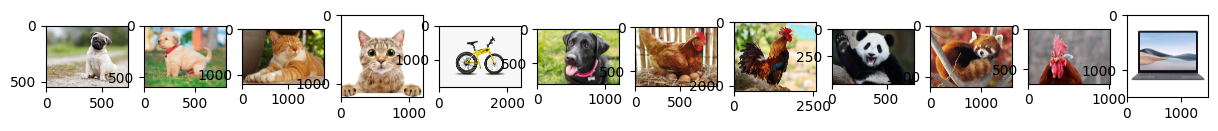

(12, 480, 480, 3)


In [2]:
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

urls=[]
urls.append("https://post.healthline.com/wp-content/uploads/2020/08/3180-Pug_green_grass-732x549-thumbnail-732x549.jpg")
urls.append("https://static.toiimg.com/thumb/msid-60132235,imgsize-169468,width-800,height-600,resizemode-75/60132235.jpg")
urls.append("https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/other/cat_relaxing_on_patio_other/1800x1200_cat_relaxing_on_patio_other.jpg")
urls.append("https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=49ed3252c0b2ffb49cf8b508892e452d")
urls.append("https://media.wired.com/photos/61afb905d184762c75e00411/master/pass/Gear-Jackbrabbit-Bike-Yellow-top.jpg")
urls.append("https://cdn.mos.cms.futurecdn.net/ZvueiLL2vdwoHWHjCRuQCW-1200-80.jpg")
urls.append("https://images.theconversation.com/files/239356/original/file-20181004-52660-1fosymz.jpg?ixlib=rb-1.1.0&rect=121%2C5%2C3214%2C2309&q=45&auto=format&w=926&fit=clip")
urls.append("https://www.thesun.co.uk/wp-content/uploads/2019/09/NINTCHDBPICT000492607142-e1567357146264.jpg")
urls.append("https://asset.kompas.com/crops/ncgvDkq11ovx_624dxbv483x_iY=/0x0:648x432/750x500/data/photo/2021/10/05/615c371c61b81.jpg")
urls.append("https://wallpaperaccess.com/full/3396763.jpg")
urls.append("https://www.thehappychickencoop.com/wp-content/uploads/2019/01/chicken-and-hen.jpg")
urls.append("https://m.media-amazon.com/images/I/81KoSSAwH2L._SL1500_.jpg")

imgs=[]
plt.figure(figsize=(15,6))
for u in range(0,len(urls)):
  r = requests.get(urls[u], stream=True) #Download
  img = np.array(Image.open(r.raw))  #Konversi ke NP Array
  plt.subplot(1,len(urls),u+1) #Menampilkan ke matplotlib
  plt.imshow(img) #Menampilkan ke matplotlib
  img = cv2.resize(img, (480,480)) #Resize sesuai input VGG 16
  imgs.append(img) #Kumpulkan semua image yang telah di preproses ke imgs
plt.show() #Menampilkan ke matplotlib
imgs = np.array(imgs) #Konversi ke Np Array
print (imgs.shape) #Debuging (Apakah shape-nya benar?)

VGG 16 memiliki target 1000 kelas https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

Kelas anjing: 151 (Chihuahua) - 268 (Mexican hairless)

Kelas kucing: 281 (tabby cat) - 287 (lynx)

In [3]:
yh = model.predict(imgs)
for i in range(len(urls)):
  if(np.argmax(yh[i]) >= 151 and np.argmax(yh[i])<=268 ):
      print("Anjing")
  elif(np.argmax(yh[i]) >= 281 and np.argmax(yh[i])<=287 ) :
      print("Kucing")
  elif(np.argmax(yh[i]) >= 7 and np.argmax(yh[i])<=8 ) :
      print("Ayam")
  elif(np.argmax(yh[i]) >= 387 and np.argmax(yh[i]) <=388):
      print("Panda")
  elif(np.argmax(yh[i]) == 671):
      print("Sepeda")
  elif(np.argmax(yh[i]) == 620):
      print("Laptop")
  else:
      print("Lainya")

1/1 [==============================] - 32s 32s/step
Anjing
Anjing
Kucing
Kucing
Sepeda
Anjing
Ayam
Ayam
Panda
Panda
Ayam
Lainya


In [12]:
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For more advanced statistical visualizations


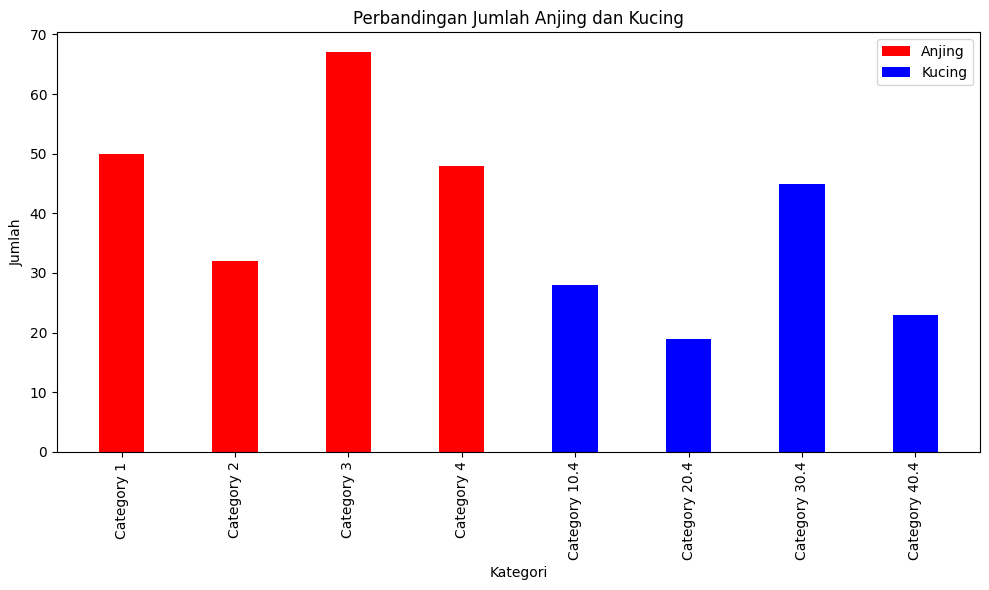

In [17]:
import matplotlib.pyplot as plt

# Assuming you have data stored in 'dog_counts' and 'cat_counts' lists
dog_counts = [50, 32, 67, 48]  # Replace with your actual data
cat_counts = [28, 19, 45, 23]  # Replace with your actual data

# Create labels for the x-axis (categories)
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']

import matplotlib.pyplot as plt

# Assuming you have data stored in 'dog_counts' and 'cat_counts' lists
dog_counts = [50, 32, 67, 48]  # Replace with your actual data
cat_counts = [28, 19, 45, 23]  # Replace with your actual data


# Create labels for the x-axis (categories)
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']

#Create the bar chart with colors
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
bar_width = 0.4
dog_bar_positions = [x for x in categories]  # Positions for dog bars
cat_bar_positions = [str(x) + str(bar_width) for x in categories]  # Offset positions for cat bars

plt.bar(dog_bar_positions, dog_counts, label='Anjing', width=bar_width, color='red')
plt.bar(cat_bar_positions, cat_counts, label='Kucing', width=bar_width, color='blue')



# Add labels and title
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Anjing dan Kucing')

# Add legend
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()
plt.show()


In [5]:
yh[0]

array([1.42653676e-04, 2.29933721e-04, 1.04183979e-04, 1.05667517e-04,
       1.76678353e-04, 1.33598820e-04, 1.62760625e-04, 1.86038960e-04,
       1.35358350e-04, 1.52582346e-04, 2.15518361e-04, 1.54088513e-04,
       1.09575463e-04, 1.10823974e-04, 2.08353551e-04, 1.61559321e-04,
       1.54495530e-04, 1.57285220e-04, 1.75785754e-04, 1.35466064e-04,
       1.38223011e-04, 7.93324216e-05, 1.07496868e-04, 1.43912301e-04,
       1.32438581e-04, 1.92531326e-04, 2.69132433e-04, 2.03093703e-04,
       1.50330990e-04, 1.79104667e-04, 2.18608737e-04, 1.86220364e-04,
       2.60002707e-04, 1.42957928e-04, 1.45835642e-04, 2.09471473e-04,
       1.62924785e-04, 1.79410330e-04, 1.09921581e-04, 1.65951002e-04,
       1.47889150e-04, 1.43081503e-04, 1.42484409e-04, 1.77221402e-04,
       1.57314018e-04, 2.86226568e-04, 1.45391954e-04, 1.89036247e-04,
       2.27003649e-04, 1.38181640e-04, 1.90511055e-04, 7.61778647e-05,
       1.63744582e-04, 2.42145848e-04, 2.08122394e-04, 1.24320009e-04,
      